In [53]:
import os
import pandas as pd
import tweepy as tw
import time
from textblob import TextBlob
    
consumer_key= 'JK6KzgIcFx4x73RLI3ItGj1TN'
consumer_secret= 'hyjFf2Kg6tbWWXB47aHwQWgdnP3DQFOk7jdSPxe7AkzJCzqXfa'
access_token= '31467843-K2GeCa6pBGaOUvPQdQRnOOgxrGSikeDKj1C3tImr9'
access_token_secret= 'VCrT3mpZrYhdA3VDXM9vVG1WSVTWHE7c0DSyypLMAnRhm'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Define the search term and the date_since date as variables
#Justin - 2020-08-31 - 2020-09-02
#Luke -  2020-09-03 - 2020-09-05

try:
    search_words = 'jaypardy'
    date_since = "2020-09-02"  
    date_until = "2020-09-12"
#     places = api.geo_search(query="USA", granularity="country")
#     place_id = places[0].id


    
    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  #geocode = "37.2718745,-119.2704153,10mi",
                  lang="en",
                  since=date_since,
                  until=date_until,
                  include_rts=False).items(1000)


    # Iterate and print tweets
    users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text, tweet.created_at] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_locs,
                              columns=['user', 'location', 'tweets', 'date'])
    tweet_text.to_csv('test.csv')

except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

tweet_text



,user,location,tweets,date
0,jaypardy,Pilipinas,RT @KayaNatinPH: Kaya Natin! Champion VP @leni...,2020-09-11 10:31:50
1,jaypardy,Pilipinas,"RT @lenirobredo: We currently have 2,796 job p...",2020-09-11 10:30:16
2,jaypardy,Pilipinas,"RT @lenirobredo: During this crisis, we have b...",2020-09-11 10:30:08
3,HmmphThis,Miles away. In your arms🧩❣️🧩,Jay! Jay! Jay! No I’m not playing Jaypardy. Th...,2020-09-10 01:05:16
4,jaypardy,Pilipinas,RT @MariahCarey: THE RARITIES Revealed 👀 Out O...,2020-09-09 17:09:27
5,jaypardy,Pilipinas,RT @JuanXODaniel: My dad has worked multiple j...,2020-09-09 16:41:07
6,jaypardy,Pilipinas,"RT @LigoSardinesPH: ""It isn’t just a can of sa...",2020-09-09 12:29:05
7,jaypardy,Pilipinas,LOUDER!!! https://t.co/c4oHAMzymY,2020-09-09 07:31:46
8,jaypardy,Pilipinas,RT @TheLaSallian: VANGUARD: The “N” in N95 mea...,2020-09-09 02:32:25
9,jaypardy,Pilipinas,RT @WHOPhilippines: People who are sick with c...,2020-09-09 02:29:04


In [1]:
#to merge the CSV files
import os
import glob
import pandas as pd
os.chdir("/Users/Luke/PythonProjects/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("tweets.csv", index=False, encoding='utf-8-sig')


In [4]:
import os
import pandas as pd
from textblob import TextBlob

tweets = pd.read_csv('tweets.csv')

#drop unnamed columns
drop_cols = [col for col in tweets.columns if 'Unnamed' in col]
tweets.drop(columns=drop_cols, inplace=True)

#make case uniform since searching strings are case sensitive
tweets['tweets'] = tweets['tweets'].str.lower()
tweets['tweets'] = tweets['tweets'].astype(str)

#put the polarity and subjectivity in the dataframe
tweets['polarity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets['subjectivity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

tweets['polarity'] = tweets['polarity'].astype(float)
tweets['subjectivity'] = tweets['subjectivity'].astype(float)

#categorizing the tweets based on search strings
tweets.loc[tweets['tweets'].str.contains('trump'), 'Candidate'] = 'Trump (Republican)'
tweets.loc[tweets['tweets'].str.contains('biden'), 'Candidate'] = 'Biden (Democrat)'


tweets.loc[tweets['tweets'].str.contains('trump'), 'Trump'] = 1
tweets.loc[tweets['tweets'].str.contains('biden'), 'Biden'] = 1

tweets['double'] = tweets['Trump'] + tweets['Biden'] 

tweets.loc[(tweets["polarity"] > 0) , "Sentiment"] = 'positive'
tweets.loc[(tweets["polarity"] < 0), "Sentiment"] = 'negative'
tweets.loc[(tweets["polarity"] == 0), "Sentiment"] = 'neutral'

#removing the tweets that are not categorized due to the truncation of the data
tweets = tweets[tweets['Candidate'].notna()]
tweets = tweets.query("double !=2")

tweets['date'] = pd.to_datetime(tweets['date']).dt.strftime('%m/%d')

tweets['count'] = 1

tweets.to_csv("sentiments.csv")

tweets



/Users/Luke/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user,location,tweets,date,state code,polarity,subjectivity,Candidate,Trump,Biden,double,Sentiment,count
0,DawsonLent,NaN,rt @duty2warn: multiple sightings in bucks cou...,09/07,NaN,0.000000,0.000000,Biden (Democrat),NaN,1.0,NaN,neutral,1
1,h7n33n,"Jerusalem, Eternal Holy United",rt @robjh1: why has biden never said hispanics...,09/07,NaN,-0.333333,0.666667,Biden (Democrat),NaN,1.0,NaN,negative,1
7,HaroIris,NaN,rt @johncardillo: could they have found a wors...,09/07,NaN,-0.600000,0.750000,Biden (Democrat),NaN,1.0,NaN,negative,1
8,Chadlassiter,"Philadelphia, PA",rt @pennlive: democratic presidential candidat...,09/07,NaN,-0.400000,0.625000,Biden (Democrat),NaN,1.0,NaN,negative,1
9,retiredslug,"Rochester, MA, USA",rt @joncoopertweets: joe biden loves our milit...,09/07,NaN,-0.100000,0.100000,Biden (Democrat),NaN,1.0,NaN,negative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214474,dangold110,NaN,he'll lose this election to joe biden,09/08,NaN,0.000000,0.000000,Biden (Democrat),NaN,1.0,NaN,neutral,1
214477,victorpapalima,NaN,rt @em_ka_17: game over for sleepy joe !!!\n\n...,09/08,NaN,-0.182812,0.325000,Biden (Democrat),NaN,1.0,NaN,negative,1
214478,Uyenguyen2,NaN,joe biden walks back his national mask mandate...,09/08,NaN,0.000000,0.000000,Biden (Democrat),NaN,1.0,NaN,neutral,1
214479,Christi54379797,"Irvine, CA",hunter biden's massive chinese cash dump | rid...,09/08,NaN,0.000000,0.500000,Biden (Democrat),NaN,1.0,NaN,neutral,1


In [6]:
tweets.describe()

,polarity,subjectivity,Trump,Biden,double,count
count,146018.000000,146018.000000,98192.0,47826.0,0.0,146018.0
mean,0.032732,0.331739,1.0,1.0,NaN,1.0
std,0.281334,0.319097,0.0,0.0,NaN,0.0
min,-1.000000,0.000000,1.0,1.0,NaN,1.0
25%,0.000000,0.000000,1.0,1.0,NaN,1.0
50%,0.000000,0.300000,1.0,1.0,NaN,1.0
75%,0.136364,0.550000,1.0,1.0,NaN,1.0
max,1.000000,1.000000,1.0,1.0,NaN,1.0


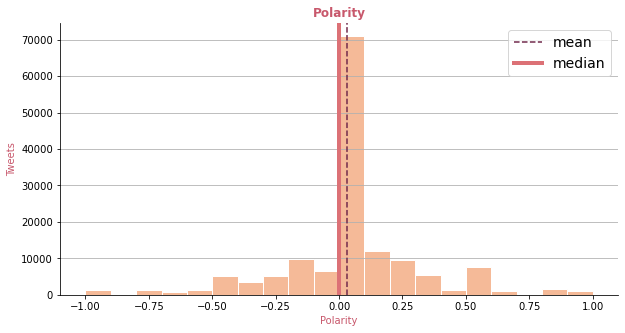

In [8]:
import matplotlib.pyplot as plt

#Check Polarity Sample to decide if we remove neutral

ax = tweets['polarity'].hist(bins=20, edgecolor='w', color='#f5ba98',  figsize=(10, 5))

# Here you can override the colors of set using rcParams by simply passing a value for the arguments.
ax.set_title('Polarity', color='#c8586c', fontweight='bold')
ax.set_xlabel('Polarity', color='#c8586c')
ax.set_ylabel('Tweets', color='#c8586c');

# To remove the spines of the chart manually, you can choose to set the visibility to False
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax.axvline(x=tweets['polarity'].mean(), color='#70284a', linestyle='--', label='mean')
ax.axvline(x=tweets['polarity'].median(), color='#dc7176', linewidth=4, label='median')
ax.legend(fontsize=14);



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#remove neutral sentiments since it's majority of the data - this will skew results

nonzero = tweets.query("Sentiment!='neutral'")
sentiment = nonzero.groupby(['date','Candidate'])['polarity'].aggregate('mean').unstack()
sentiment


Candidate,Biden (Democrat),Trump (Republican)
date,,
08/28,0.053801,0.066279
08/29,0.029684,-0.115859
08/30,0.160325,-0.040667
08/31,0.084721,-0.034390
09/01,0.026039,0.028938
09/02,0.028334,0.052662
09/03,0.034501,-0.014779
09/04,-0.020007,0.039984
09/05,0.117386,0.049629


In [10]:
#just test the samples
tweets.groupby(['date','Candidate','Sentiment'])['count'].aggregate('sum').unstack()


Sentiment                 negative  neutral  positive
date  Candidate                                      
08/28 Biden (Democrat)         356      490       604
      Trump (Republican)      1181     2452      2269
08/29 Biden (Democrat)        1289     2040      1759
      Trump (Republican)       324      263       198
08/30 Biden (Democrat)         659     2403      2041
      Trump (Republican)       192      331       240
08/31 Biden (Democrat)         781     2469      1687
      Trump (Republican)       186      218       179
09/01 Biden (Democrat)        1116     1873      1690
      Trump (Republican)       256      347       393
09/02 Biden (Democrat)         328      706       533
      Trump (Republican)      1231     2630      2209
09/03 Biden (Democrat)         108      197       154
      Trump (Republican)       711      628       542
09/04 Biden (Democrat)         185      212       134
      Trump (Republican)       647      795       746
09/05 Biden (Democrat)          92      205       183
      Trump (Republican)       788     1091       984
09/06 Biden (Democrat)         133      240       266
      Trump (Republican)       956     1185      1012
09/07 Biden (Democrat)        1653     2928      1435
      Trump (Republican)      3075     3807      3542
09/08 Biden (Democrat)        1801     3082      3055
      Trump (Republican)      5802    11874      9940
09/09 Biden (Democrat)        1043     1933      1280
      Trump (Republican)      3190     4808      3279
09/10 Biden (Democrat)         177      255       158
      Trump (Republican)       791     1203       829
09/11 Biden (Democrat)        1207     1757      1129
      Trump (Republican)      4687     7915      8263

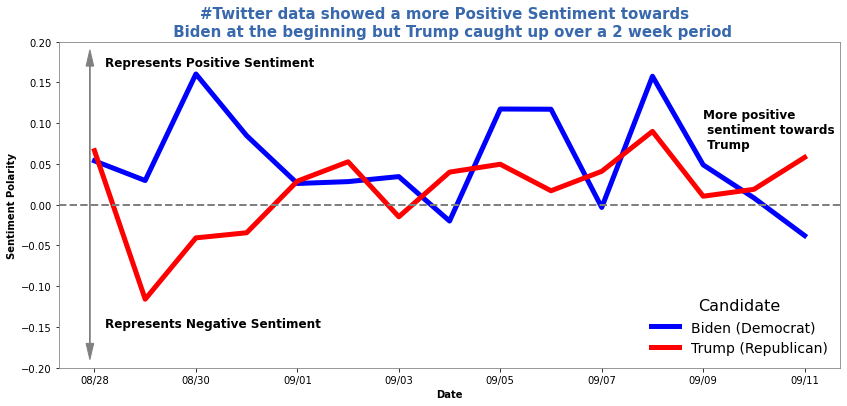

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

#if pivot chart
# axis_1 = tweets.pivot_table('polarity', index='date', columns='Candidate', aggfunc='mean').plot(figsize=(12, 6),
#                                                                                                 linewidth = 3)

fig = plt.figure(figsize=(14, 6))

axis_1 = sentiment['Biden (Democrat)'].plot(kind='line',color='blue',label="Biden (Democrat)", linewidth = 5)
axis_1 = sentiment['Trump (Republican)'].plot(kind='line',color='red',label="Trump (Republican)", linewidth = 5)

plt.ylabel('Sentiment Polarity',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.title('#Twitter data showed a more Positive Sentiment towards  \n Biden at the beginning but Trump caught up over a 2 week period', size = 15, color='#3969AC', fontweight='bold')
axis_1.legend(frameon=False, loc='lower right', fontsize = 14, title = "Candidate", title_fontsize = 16)
axis_1.set_facecolor('xkcd:white')
axis_1.spines['bottom'].set_color('0.5')
axis_1.spines['top'].set_color('0.5')
axis_1.spines['right'].set_color('0.5')
axis_1.spines['left'].set_color('0.5')
axis_1.set_ylim(-0.20,0.20)

plt.text(12, .07, 'More positive \n sentiment towards \n Trump', fontweight='bold', fontsize = 12)



axis_1.axhline(y=0, color='gray',linestyle='--', linewidth = 2)
plt.text(0.2, .17,'Represents Positive Sentiment', fontweight='bold', fontsize = 12)
plt.text(0.2, -.15,'Represents Negative Sentiment', fontweight='bold', fontsize = 12)
# P.arrow( x, y, dx, dy, **kwargs )
plt.arrow(-.09, -0.02, 0.0, -0.15, fc="gray", ec="gray",head_width=0.15, head_length=0.02)
plt.arrow(-.09, -0.02, 0.0, 0.19, fc="gray", ec="gray",head_width=0.15, head_length=0.02);





In [17]:

summary = tweets.groupby(['Candidate','Sentiment'])['count'].sum().unstack()
#del summary['neutral']


summary.T 
summary.T / summary.sum(axis=1)

data = summary.T / summary.sum(axis=1) * 100
#data.sort_values(by=['state code'], inplace=True, ascending=False)


data

Candidate,Biden (Democrat),Trump (Republican)
Sentiment,,
negative,22.849496,24.460241
neutral,43.470079,40.276194
positive,33.680425,35.263565


In [18]:
sentiments = pd.read_csv('sentiments.csv')

summary = sentiments.groupby(['state code','Sentiment'])['count'].sum().unstack()
#del summary['neutral']

summary.T 
summary.T / summary.sum(axis=1)

data = summary.T / summary.sum(axis=1) * 100
data.sort_values(by=['Sentiment'], inplace=True, ascending=True)

data = data.T
data = data.sort_values('neutral', ascending=False)
data = data.head(5)
data

/Users/Luke/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Sentiment,negative,neutral,positive
state code,,,
DE,4.428571,88.857143,6.714286
TX,13.198573,68.608799,18.192628
NC,14.590164,68.196721,17.213115
FL,2.439024,58.536585,39.024390
CA,16.064982,56.317690,27.617329


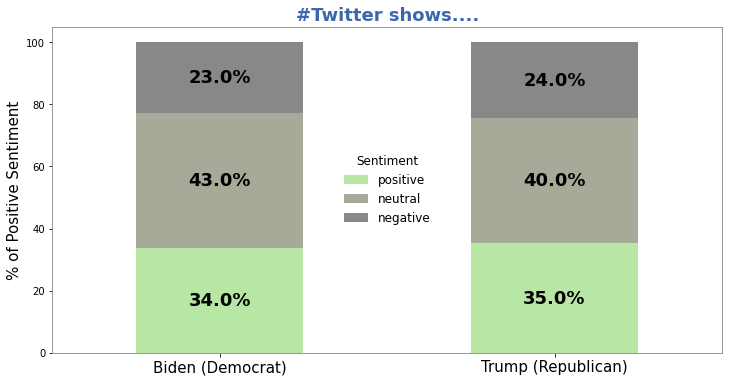

In [72]:
summary = tweets.groupby(['Candidate','Sentiment'])['count'].sum().unstack()
#del summary['neutral']

#tweets[df['date'].max].groupby(['key1']).size().reset_index(name='count') 


summary.T 
summary.T / summary.sum(axis=1)

data = summary.T / summary.sum(axis=1) * 100
data.sort_values(by=['Sentiment'], inplace=True, ascending=False)


ax = data.T.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#b7e6a5','#A5AA99','#888888'], width = .5)

ax.set_title('#Twitter shows....', fontsize=18, color='#3969AC',fontweight='bold')
ax.set_xticklabels(['Biden (Democrat)', 'Trump (Republican)'], rotation=0, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('% of Positive Sentiment', fontsize=15)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.set_facecolor('xkcd:white')
ax.legend(frameon=False, loc='center', fontsize = 12, title = "Sentiment", title_fontsize = 12)
ax.xaxis.grid(False)


labels = []
for i in data.index:
    for j in data.columns:
        label = str(round(data.loc[i][j],0))+ "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize = 18, fontweight='bold')
        


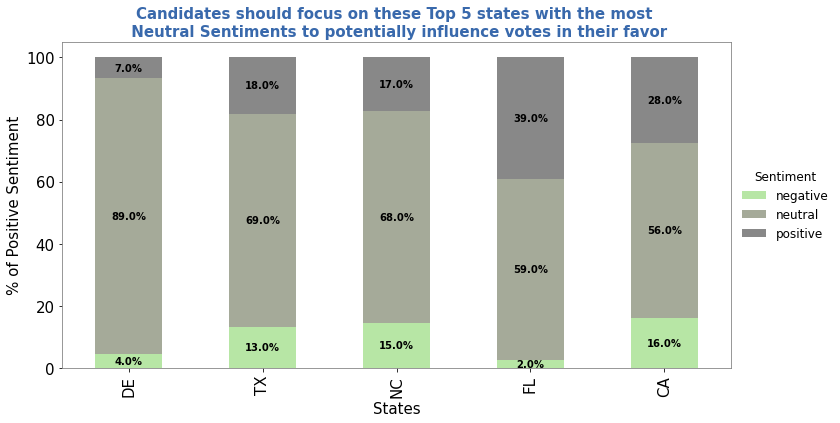

In [77]:
sentiments = pd.read_csv('sentiments.csv')
#sentiments = sentiments.query("Candidate == 'Biden (Democrat)'")


summary = sentiments.groupby(['state code','Sentiment'])['count'].sum().unstack()
#del summary['neutral']

summary.T 
summary.T / summary.sum(axis=1)

data = summary.T / summary.sum(axis=1) * 100
data.sort_values(by=['Sentiment'], inplace=True, ascending=True)

data = data.T
data = data.sort_values('neutral', ascending=False)
data = data.head(5)

ax = data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#b7e6a5','#A5AA99','#888888'], width = .5)

ax.set_title('Candidates should focus on these Top 5 states with the most \n Neutral Sentiments to potentially influence votes in their favor', fontsize=15, color='#3969AC',fontweight='bold')
ax.set_xlabel('States',fontsize=15)
ax.set_ylabel('% of Positive Sentiment', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.set_facecolor('xkcd:white')
ax.legend(frameon=False,loc='center left', fontsize = 12, title = "Sentiment", title_fontsize = 12,bbox_to_anchor=(1, 0.5))
ax.xaxis.grid(False)


labels = []
for j in data.columns:
    for i in data.index:
        label = str(round(data.loc[i][j],0))+ "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize = 10, fontweight='bold')
        


In [7]:
import os
import pandas as pd
import tweepy as tw
import time
from textblob import TextBlob
    
consumer_key= 'JK6KzgIcFx4x73RLI3ItGj1TN'
consumer_secret= 'hyjFf2Kg6tbWWXB47aHwQWgdnP3DQFOk7jdSPxe7AkzJCzqXfa'
access_token= '31467843-K2GeCa6pBGaOUvPQdQRnOOgxrGSikeDKj1C3tImr9'
access_token_secret= 'VCrT3mpZrYhdA3VDXM9vVG1WSVTWHE7c0DSyypLMAnRhm'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

search_words = "Biden OR Trump"
date_since = "2020-09-0"  
date_until = "2020-09-08"

for i in longlat.index:
    lat = longlat.iloc[i,1].astype(str)
    long = longlat.iloc[i,2].astype(str)
    state = longlat.iloc[i,0]
    statename = longlat.iloc[i,3]
    geo = lat + "," + long + "," + "20mi"

    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since,
                  until=date_until,
                  geocode= geo,
                  include_rts=False).items(1000)

    # Iterate and print tweets
    users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text, tweet.created_at, statename] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_locs, 
                              columns=['user', 'location', 'tweets', 'date', 'state'])
    tweet_text
    tweet_text.to_csv(state+".csv")
    time.sleep(20)



TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)